In [1]:
print("test")

test


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print(cv2.__version__)


4.9.0


Generate Aruco

4.9.0


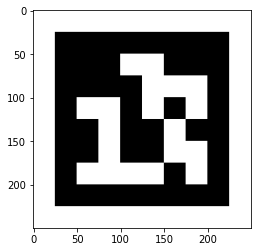

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print(cv2.__version__)

# Verifikasi bahwa modul aruco tersedia
if not hasattr(cv2, 'aruco'):
    raise AttributeError("Modul 'aruco' tidak ditemukan dalam 'cv2'. Pastikan Anda telah menginstal 'opencv-contrib-python'.")

# Ukuran gambar dan ukuran marker
image_size = (250, 250)
marker_size = 200

# Buat gambar latar belakang putih
white_background = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Tentukan dictionary ArUco yang akan digunakan
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

# Tentukan ID marker yang ingin dibuat
marker_id = 8

# Tentukan ukuran marker dalam piksel
marker_size = 200

# Generate marker dengan ID yang ditentukan
marker_image = cv2.aruco.generateImageMarker(aruco_dict, marker_id, marker_size)

# Konversi marker_image dari grayscale ke RGB
marker_image_rgb = cv2.cvtColor(marker_image, cv2.COLOR_GRAY2BGR)

# Hitung posisi tengah untuk menempatkan marker di tengah gambar
center_x = (image_size[1] - marker_size) // 2
center_y = (image_size[0] - marker_size) // 2

# Tempatkan marker di tengah gambar latar belakang putih
white_background[center_y:center_y+marker_size, center_x:center_x+marker_size] = marker_image_rgb

# Simpan marker ke file
filenamearuco = f'aruco_marker_{marker_id}.png'
cv2.imwrite(filenamearuco, white_background)

# Tampilkan marker (opsional)
plt.imshow(white_background)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Generate Karpet Aruco

4.9.0


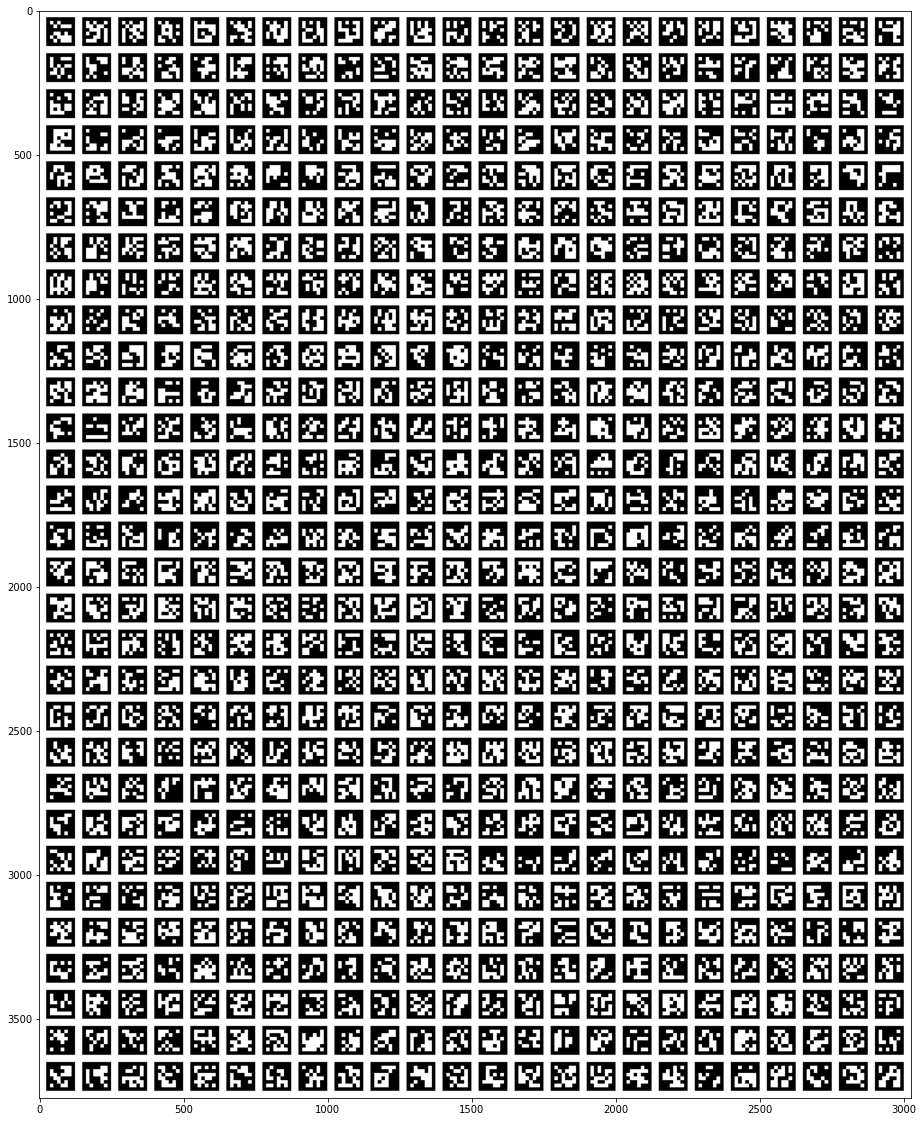

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print(cv2.__version__)

# Verifikasi bahwa modul aruco tersedia
if not hasattr(cv2, 'aruco'):
    raise AttributeError("Modul 'aruco' tidak ditemukan dalam 'cv2'. Pastikan Anda telah menginstal 'opencv-contrib-python'.")

# Ukuran setiap marker dan jarak antar marker
marker_size = 100
padding = 25
num_rows = 30
num_cols = 24
total_markers = num_rows * num_cols

# Ukuran gambar latar belakang putih
image_width = (marker_size + padding) * num_cols + padding
image_height = (marker_size + padding) * num_rows + padding
white_background = np.ones((image_height, image_width, 3), dtype=np.uint8) * 255

# Tentukan dictionary ArUco yang akan digunakan
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_1000)

# Generate dan tempatkan setiap marker pada grid
current_marker_id = 0
for row in range(num_rows):
    for col in range(num_cols):
        if current_marker_id >= total_markers:
            break
        marker_image = cv2.aruco.generateImageMarker(aruco_dict, current_marker_id, marker_size)
        marker_image_rgb = cv2.cvtColor(marker_image, cv2.COLOR_GRAY2BGR)
        
        start_x = col * (marker_size + padding) + padding
        start_y = (num_rows - 1 - row) * (marker_size + padding) + padding
        
        white_background[start_y:start_y + marker_size, start_x:start_x + marker_size] = marker_image_rgb
        
        current_marker_id += 1

# Simpan gambar ke file
filenamearuco = 'aruco_grid.png'
cv2.imwrite(filenamearuco, white_background)

# Tampilkan marker (opsional)
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(white_background, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Aruco Detection

4.9.0
ArUco markers detected. IDs:  [[186]
 [690]
 [689]
 [688]
 [687]
 [686]
 [685]
 [684]
 [683]
 [682]
 [681]
 [680]
 [679]
 [678]
 [677]
 [676]
 [675]
 [674]
 [673]
 [672]
 [719]
 [718]
 [717]
 [716]
 [715]
 [714]
 [ 23]
 [ 22]
 [ 21]
 [ 20]
 [ 19]
 [ 18]
 [ 17]
 [ 16]
 [ 15]
 [ 14]
 [ 13]
 [ 12]
 [ 11]
 [ 10]
 [  9]
 [  8]
 [  7]
 [  6]
 [  5]
 [  4]
 [  3]
 [  2]
 [  1]
 [  0]
 [713]
 [712]
 [711]
 [710]
 [709]
 [708]
 [707]
 [706]
 [705]
 [704]
 [703]
 [702]
 [701]
 [700]
 [699]
 [698]
 [697]
 [696]
 [ 47]
 [ 46]
 [ 45]
 [ 44]
 [ 43]
 [ 42]
 [ 41]
 [ 40]
 [ 39]
 [ 38]
 [ 37]
 [ 36]
 [ 35]
 [ 34]
 [ 33]
 [ 32]
 [ 31]
 [ 30]
 [ 29]
 [ 28]
 [ 27]
 [ 26]
 [ 25]
 [ 24]
 [ 71]
 [ 70]
 [ 69]
 [ 68]
 [ 67]
 [ 66]
 [ 65]
 [ 64]
 [ 63]
 [ 62]
 [ 61]
 [ 60]
 [ 59]
 [ 58]
 [ 57]
 [ 56]
 [ 55]
 [ 54]
 [ 53]
 [ 52]
 [ 51]
 [ 50]
 [ 49]
 [ 48]
 [ 95]
 [ 94]
 [ 93]
 [ 92]
 [ 91]
 [ 90]
 [ 89]
 [ 88]
 [ 87]
 [ 86]
 [ 85]
 [ 84]
 [ 83]
 [ 82]
 [ 81]
 [ 80]
 [ 79]
 [ 78]
 [ 77]
 [ 76]
 [ 75]
 [ 74

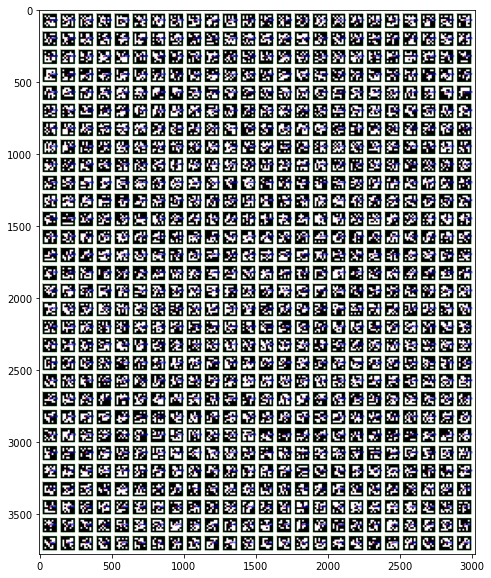

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print(cv2.__version__)

# Baca gambar
image = cv2.imread('aruco_grid.png')
# image = cv2.imread(filenamearuco)

# Periksa apakah gambar berhasil dibaca
if image is None:
    print(f"Error: Gambar tidak ditemukan atau tidak bisa dibaca.")
    exit()

# Konversi ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inisialisasi dictionary ArUco dan parameter detektor
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_1000)
aruco_params = cv2.aruco.DetectorParameters()

# Deteksi marker pada gambar
corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)

# Gambar deteksi marker pada gambar asli
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image, corners, ids)
    print("ArUco markers detected. IDs: ", ids)
    print("Corners : ", corners)
    for i in range(len(ids)):
        radius = 5
        ujung = 4
        if ujung == 4:
            xTengah = (int(corners[i][0][0][0])+int(corners[i][0][1][0])+int(corners[i][0][2][0])+int(corners[i][0][3][0]))/4
            yTengah = (int(corners[i][0][0][1])+int(corners[i][0][1][1])+int(corners[i][0][2][1])+int(corners[i][0][3][1]))/4
            cv2.circle(image,(int(xTengah),int(yTengah)), int(radius) , (0,0,255), -1)
        if ujung != 4:
            cv2.circle(image,(int(corners[i][0][int(ujung)][0]),int(corners[i][0][int(ujung)][1])), int(radius), (0,0,255), -1)

else:
    print("No ArUco markers detected.")

# Tentukan faktor skala
scale_factor = 1  # Misalnya, mengurangi skala menjadi setengah

# Ukuran gambar atau bingkai awal
height, width = image.shape[:2]

# Ukuran gambar atau bingkai setelah diskalakan
new_height = int(height * scale_factor)
new_width = int(width * scale_factor)

# Lakukan penyesuaian skala menggunakan cv2.resize()
scaled_image = cv2.resize(image, (new_width, new_height))

# Tampilkan hasil deteksi
# cv2.imshow('Detected ArUco Markers', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.show()


In [21]:
print(corners)
print(corners[0][0][1])


(array([[[2275., 2775.],
        [2374., 2775.],
        [2374., 2874.],
        [2275., 2874.]]], dtype=float32), array([[[2275.,  150.],
        [2374.,  150.],
        [2374.,  249.],
        [2275.,  249.]]], dtype=float32), array([[[2150.,  150.],
        [2249.,  150.],
        [2249.,  249.],
        [2150.,  249.]]], dtype=float32), array([[[2025.,  150.],
        [2124.,  150.],
        [2124.,  249.],
        [2025.,  249.]]], dtype=float32), array([[[1900.,  150.],
        [1999.,  150.],
        [1999.,  249.],
        [1900.,  249.]]], dtype=float32), array([[[1775.,  150.],
        [1874.,  150.],
        [1874.,  249.],
        [1775.,  249.]]], dtype=float32), array([[[1650.,  150.],
        [1749.,  150.],
        [1749.,  249.],
        [1650.,  249.]]], dtype=float32), array([[[1525.,  150.],
        [1624.,  150.],
        [1624.,  249.],
        [1525.,  249.]]], dtype=float32), array([[[1400.,  150.],
        [1499.,  150.],
        [1499.,  249.],
        [1400.,

In [15]:
for i in range(len(ids)):
    print(int(corners[i][0][0][0]))
    print(int(corners[i][0][0][1]))

359
310
427
255
233
273
298
185
425
163
195
155


In [1]:
import cv2
import numpy as np
import os
from time import sleep, perf_counter

id_min1 = []
ids = []
dataAkhir = [["Waktu", "X_movAvg", "y_movAvg", "Pusat x", "Pusat y", "MFP X", "MFP Y", "Pixel pusat X", "Pixel pusat Y", "Pixel MFP X", "Pixel MFP Y"]]
num_rows = 25
num_cols = 20

def movAvg(window,dataMovAvgX,dataMovAvgY,xEst,yEst):
    if len(dataMovAvgX) >= (window-1):
        dataMovAvgX.append(xEst)
        dataMovAvgY.append(yEst)
        xAvg = (sum(dataMovAvgX)/len(dataMovAvgX))
        yAvg = (sum(dataMovAvgY)/len(dataMovAvgY))
        dataMovAvgX.pop(0)
        dataMovAvgY.pop(0)
    elif len(dataMovAvgX) < (window-1):
        dataMovAvgX.append(xEst)
        dataMovAvgY.append(yEst)
        xAvg = xEst
        yAvg = yEst
    return xAvg, yAvg,dataMovAvgX,dataMovAvgY

def saveImage(output_folder,file_counter,frame):
    # Simpan gambar ke file
    filename = os.path.join(output_folder, f'detected_marker_{file_counter:04d}.png')
    cv2.imwrite(filename, frame)
    file_counter += 1
    return file_counter
    # kalo mau pake fungsi, copas aja gini -> file_counter = saveImage(output_folder,file_counter,frame)

def dataAruco(num_rows,num_cols,jarak):
        
    total_markers = num_rows * num_cols
    databasePos = []
    dataID = []
    i = 1
    for row in range(num_cols):
        for col in range(num_rows):
            posX = jarak*row
            posY = jarak*col
            databasePos.append([posX, posY])
            dataID.append(i)
            i += 1
    # print(np.array(databasePos))
    # print(databasePos[dataID.index(500)])
    return dataID, databasePos

def convertPos(image, ids, corners, dataID, databasePos):

    ###### est posisi berdasarkan database posisi real #####
    sumx = 0
    sumy = 0
    for i in range(len(ids)): 
        sumx += databasePos[dataID.index(ids[i])][0]
        sumy += databasePos[dataID.index(ids[i])][1]

    x = sumx/len(ids)
    y = sumy/len(ids)

    ###### titik tengah setiap marker aruco #####
    tengah = []
    radius = 5
    for i in range(len(ids)):
        xTengah = (int(corners[i][0][0][0])+int(corners[i][0][1][0])+int(corners[i][0][2][0])+int(corners[i][0][3][0]))/4
        yTengah = (int(corners[i][0][0][1])+int(corners[i][0][1][1])+int(corners[i][0][2][1])+int(corners[i][0][3][1]))/4
        tengah.append([xTengah, yTengah])
        cv2.circle(image,(int(xTengah),int(yTengah)), int(radius) , (0,0,255), -1)

    ###### titik tengah rata rata (est posisi dalam pixel) #####
    sumtengahx = 0
    sumtengahy = 0
    for i in range(len(ids)):
        sumtengahx += tengah[i][0]
        sumtengahy += tengah[i][1]

    posPixelX = int(sumtengahx/len(ids))
    posPixelY = int(sumtengahy/len(ids))

    cv2.circle(image,(posPixelX,posPixelY), int(2*radius), (0,255,0), -1)

    ###### Pusat Kamera #####
    height, width = image.shape[:2]
    pusatKameraX = int(width/2)
    pusatKameraY = int(height/2)
    cv2.circle(image,(pusatKameraX,pusatKameraY), int(2*radius), (255,0,0), -1)

    ###### est posisi pusat kamera #####
    aX = 0.123
    aY = 0.131
    rXPixel = pusatKameraX - posPixelX
    rYPixel = pusatKameraY - posPixelY
    rX = rXPixel * aX
    rY = rYPixel * aY
    xEst = x + rX
    yEst = y + rY

    return x,y,posPixelX,posPixelY,xEst,yEst,pusatKameraX,pusatKameraY

# Buat folder baru jika belum ada
output_folder = 'detected_frames'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# membuat database posisi tiap marker aruco
dataID, databasePos = dataAruco(num_rows,num_rows,19.5)

# Inisialisasi counter untuk penamaan file berurutan
file_counter = 0

# Inisialisasi waktu
init_time = perf_counter()
current_time = 0

# Inisialisasi kamera
ardrone_url = 'tcp://192.168.1.1:5555'
cap = cv2.VideoCapture(ardrone_url)

# Periksa apakah kamera berhasil dibuka
if not cap.isOpened():
    print("Error: Tidak dapat membuka kamera.")
    exit()

# Inisialisasi dictionary ArUco dan parameter detektor
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_1000)
aruco_params = cv2.aruco.DetectorParameters()

id_1 = []
window = 1
dataMovAvgX = []
dataMovAvgY = []

while True:
    current_time = perf_counter()
    # Baca frame dari kamera
    ret, frame = cap.read()

    # Periksa apakah frame berhasil dibaca
    if not ret:
        print("Error: Tidak dapat membaca frame dari kamera.")
        break

    # Konversi frame ke grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Deteksi marker pada frameco_dict, parameters=aruco_params)

    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)
    # Gambar deteksi marker pada frame
    if ids is not None:
        cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        x,y,posPixelX,posPixelY,xEst,yEst,pusatKameraX,pusatKameraY = convertPos(frame, ids, corners, dataID, databasePos)
        xAvg, yAvg, dataMovAvgX, dataMovAvgY = movAvg(window,dataMovAvgX,dataMovAvgY,xEst,yEst)

        dataAkhir.append([current_time, xAvg, yAvg, xEst, yEst, x, y, pusatKameraX, pusatKameraY, posPixelX, posPixelY])
        if (len(id_1) != len(ids)) or ((len(id_1) == len(ids)) and (id_1[0] != ids[0])):
            # print("ArUco markers detected. IDs: ", ids)
            id_1 = ids
            
    # Tampilkan frame dengan deteksi marker
    cv2.imshow('Detected ArUco Markers', frame)

    # Tekan 'q' untuk keluar dari loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Lepaskan kamera dan tutup jendela
cap.release()
cv2.destroyAllWindows()
np.savetxt("Data_Akhir.txt", dataAkhir, fmt="%s")


Database Karpet Shania

In [8]:
num_rows = 25
num_cols = 20
def dataAruco(num_rows,num_cols,jarak):
        
    total_markers = num_rows * num_cols
    databasePos = []
    dataID = []
    i = 1
    for row in range(num_cols):
        for col in range(num_rows):
            posX = jarak*row
            posY = jarak*col
            databasePos.append([posX, posY])
            dataID.append(i)
            i += 1
    # print(np.array(databasePos))
    # print(databasePos[dataID.index(500)])
    return dataID, databasePos



# membuat database posisi tiap marker aruco
dataID, databasePos = dataAruco(num_rows,num_rows,19.5)
# print(np.array(databasePos))
print(databasePos[dataID.index(500)])

[370.5, 468.0]


Database karpet catur

In [2]:
databaseID = [476,480,484,488,492,496,500,376,380,384,388,392,396,400,276,280,284,288,292,296,300,201,205,209,213,217,221,225,101,105,109,113,117,121,125,1,5,9,13,17,21,25,]
databasePosisi = [[0,60],[0,50],[0,40],[0,30],[0,20],[0,10],[0,0],[10,60],[10,50],[10,40],[10,30],[10,20],[10,10],[10,0],[20,60],[20,50],[20,40],[20,30],[20,20],[20,10],[20,0],[30,60],[30,50],[30,40],[30,30],[30,20],[30,10],[30,0],[40,60],[40,50],[40,40],[40,30],[40,20],[40,10],[40,0],[50,60],[50,50],[50,40],[50,30],[50,20],[50,10],[50,0]]
print(len(databaseID),len(databasePosisi))

42 42


pemosisian untuk baca file gambar bukan video

4.9.0
ArUco markers detected. IDs:  [[582]
 [605]
 [604]
 [581]
 [606]
 [580]]
Pusat Kamera pada 207 , 143
POSISI = 245.0 50.0
POSISI PIXEL= 187 125
PUSAT KAMERA PIXEL= 207 143


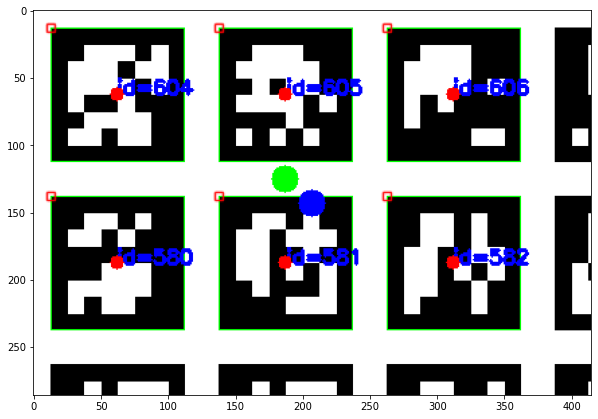

In [5]:
id_min1 = []
ids = []

def convertPos(image, ids, corners):
    #summing
    sumx = 0
    sumy = 0
    for i in range(len(ids)):
        
        sumx += databasePos[int(ids[i])][1]
        sumy += databasePos[int(ids[i])][2]

    x = sumx/len(ids)
    y = sumy/len(ids)
    

    tengah = []
    radius = 5
    for i in range(len(ids)):
        xTengah = (int(corners[i][0][0][0])+int(corners[i][0][1][0])+int(corners[i][0][2][0])+int(corners[i][0][3][0]))/4
        yTengah = (int(corners[i][0][0][1])+int(corners[i][0][1][1])+int(corners[i][0][2][1])+int(corners[i][0][3][1]))/4
        tengah.append([xTengah, yTengah])
        cv2.circle(image,(int(xTengah),int(yTengah)), int(radius) , (0,0,255), -1)

    sumtengahx = 0
    sumtengahy = 0
    for i in range(len(ids)):
        sumtengahx += tengah[i][0]
        sumtengahy += tengah[i][1]

    posPixelX = int(sumtengahx/len(ids))
    posPixelY = int(sumtengahy/len(ids))
    cv2.circle(image,(posPixelX,posPixelY), int(2*radius), (0,255,0), -1)

    # Pusat Kamera
    height, width = image.shape[:2]
    pusatKameraX = int(width/2)
    pusatKameraY = int(height/2)
    cv2.circle(image,(pusatKameraX,pusatKameraY), int(2*radius), (255,0,0), -1)
    
    return x,y,posPixelX,posPixelY,pusatKameraX,pusatKameraY

# Ukuran setiap marker dan jarak antar marker
marker_size = 100
padding = 25
num_rows = 30
num_cols = 24
total_markers = num_rows * num_cols
databasePos = []
dataID = 0
for row in range(num_rows):
    for col in range(num_cols):
        posX = 10*row
        posY = 10*col
        databasePos.append([dataID, posX, posY])
        dataID += 1
        

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print(cv2.__version__)

# Baca gambar
image = cv2.imread('aruco_pos1.png')
# image = cv2.imread(filenamearuco)

# Periksa apakah gambar berhasil dibaca
if image is None:
    print(f"Error: Gambar tidak ditemukan atau tidak bisa dibaca.")
    exit()

# Konversi ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inisialisasi dictionary ArUco dan parameter detektor
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_1000)
aruco_params = cv2.aruco.DetectorParameters()

# Deteksi marker pada gambar
corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)

# Gambar deteksi marker pada gambar asli
if ids is not None:
    cv2.aruco.drawDetectedMarkers(image, corners, ids)
    print("ArUco markers detected. IDs: ", ids)
    
else:
    print("No ArUco markers detected.")

# Konversi Jarak
x,y,posPixelX,posPixelY,pusatKameraX,pusatKameraY = convertPos(image, ids, corners)
print("POSISI = " + str(x)+" " + str(y))
print("POSISI PIXEL= " + str(posPixelX)+" " + str(posPixelY))
print("PUSAT KAMERA PIXEL= " + str(pusatKameraX)+" " + str(pusatKameraY))


# Tampilkan hasil deteksi
# cv2.imshow('Detected ArUco Markers', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
# id_min1 = [] #id sebelumnya
# id_0 = [] #id sekarang
# x_min1 = None #posisi sebelumnya
# y_min1 = None
# x_0 = None #posisi sekarang
# y_0 = None
# ry = None #jarak y ke y pusat kamera
# rx = None #jarak x ke x pusat kamera

# if len(ids) > 1 :
#     Delta = True
#     if len(id_min1) == 0:
#         id_min1 = ids
#         x,y,posPixelX,posPixelY = convertPos(image, ids, corners)
#         x_min1 = x
#         y_min1 = y
#     elif len(id_min1) != 0:
#         id_0 = ids
#         if len(id_0) == len(id_min1):
#             x,y,posPixelX,posPixelY = convertPos(image, ids, corners)
#             x_0 = x
#             y_0 = y
#             x_min1 = x_0
#             y_min1 = y_0
#             Delta = False
#         elif len(id_0) != len(id_min1):
#             x,y,posPixelX,posPixelY = convertPos(image, ids, corners)
#             x_0 = x
#             y_0 = y
#     if Delta == True:
#         deltaX = x_min1 - x_0
#         deltaY = y_min1 - y_0
#         if deltaY == 0:

#         elif deltaY != 0:
#             if deltaY > 0:
#                 posY = y - ry
#                 if deltaX == 0:
#                     posX = 
#             elif deltaY < 0:


# elif len(ids) == 1 :
#     x,y,posPixelX,posPixelY = convertPos(image, ids, corners)

Live plot data

In [23]:
import matplotlib
matplotlib.use('TkAgg')  # Pastikan menggunakan backend GUI yang tepat
import matplotlib.pyplot as plt
import numpy as np
import time
import random

# Generate random data values
x = []
y = []

# Enable interactive mode
plt.ion()

# Create subplot and figure
figure, ax = plt.subplots(figsize=(10, 8))
line1, = ax.plot(x, y, color='blue', marker='.',linewidth=0.5, markersize=15)

# Set labels
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Updating plot...")

# Set limits for the x and y axis
# ax.set_xlim(0,50)
# ax.set_ylim(0,6)

# Loop to update the plot
for i in range(100):
    # Update the value of x and y
    x.append(random.randint(1, random.randint(1, 100)))
    y.append(random.randint(1, random.randint(1, 55)))

    # Register the value of x and y
    datax = np.array(x)
    datay = np.array(y)

    line1.set_xdata(datax )
    line1.set_ydata(datay)
    
    # Set limits for the x and y axis
    ax.set_xlim(0, np.max(x))
    ax.set_ylim(0, np.max(y))

    # Re-draw the figure
    ax.relim()
    ax.autoscale_view()
    figure.canvas.draw()
    
    # To flush the GUI events
    figure.canvas.flush_events()
    plt.pause(0.1)

# Turn off interactive mode
plt.ioff()

# Keep the plot window open
plt.show(block=True)
